(246, 368, 3)
246
368


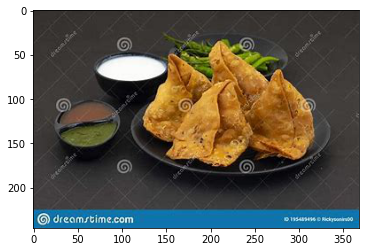

In [113]:
##To begin, load your favourite image, approximately samosachutney.jpg and save the resulting matrix
##as imgmat. Use the size function to find the dimensions m, n of the matrix.


import numpy as np
import matplotlib.pyplot as plt
imgmat=plt.imread("images\samosachutney2.jfif")#loading my favourite image
plt.imshow(imgmat)
m=np.size(imgmat,axis=0)#using the size function 
n=np.size(imgmat,axis=1)#using the size function
print(imgmat.shape)
print(m)
print(n)

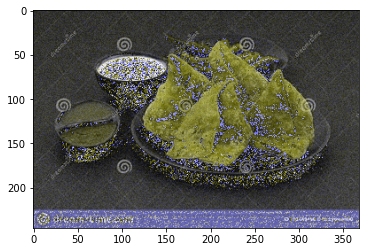

In [114]:
##Introduce some noise into the image by adding random fluctuations of color to each point:
##imgmat=imgmat+50*(np.random.rand(m,n)-0.5);
##Observe that the command rand(m,n) produces a matrix of the dimension m × n filled with pseudorandom numbers within the interval (0, 1). The amplitude of the noise is equal to 25 shades of
##gray.
def noise():
    imgmat[:,:,0]=imgmat[:,:,0]+50*(np.random.rand(m,n)-0.5);#introducing the given noise
    imgmat[:,:,1]=imgmat[:,:,1]+50*(np.random.rand(m,n)-0.5);
    imgmat[:,:,2]=imgmat[:,:,2]+50*(np.random.rand(m,n)-0.5);
    imgmat[:,:,0]=np.mean(imgmat,axis=2)#taking the mean of elements along axis2
    imgmat[:,:,1]=imgmat[:,:,0]#equating the values of the R,G and B to produce gray scale image
    imgmat[:,:,1]=imgmat[:,:,0]
    plt.imshow(imgmat)
noise()

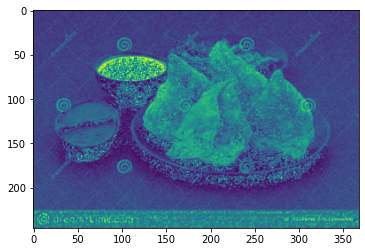

In [115]:
##Use the convolution function to apply
##the Gaussian filter and display the result.

gaussian=np.array([[0,1,0],[1,4,1],[0,1,0]])#introducing gaussing kernel to blur the image
gaussian=gaussian/8
padded_image=np.zeros((248,370),dtype=np.float64) 
padded_image[1:-1,1:-1]=imgmat[:,:,0]
output_image=np.zeros((246,368),dtype=np.float64)
def conv():#defining the convolution function
    
    
    for i in range(1,247):##the range will be till 246

      for j in range(1,369):

       

        output_image[i-1,j-1] = padded_image[i-1,j-1]*gaussian[0,0] + padded_image[i-1,j]*gaussian[0,1] + padded_image[i-1,j+1]*gaussian[0,2] +padded_image[i,j-1]*gaussian[1,0] + padded_image[i,j]*gaussian[1,1] + padded_image[i,j+1]*gaussian[1,2]+ padded_image[i+1,j-1]*gaussian[2,0] + padded_image[i+1,j]*gaussian[2,1] + padded_image[i+1,j+1]*gaussian[2,2]
    
    plt.imshow(output_image)
conv()

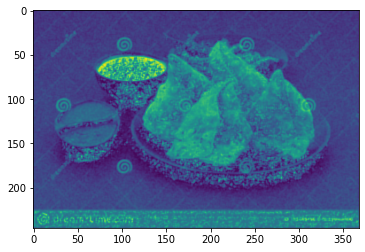

In [116]:
##Observe that we can “layer” filter effects. Perform another convolution with the Gaussian kernel on
##the image and display the result. Devise a matrix for a filter which is equivalent to applying Gaussian
##convolution twice.
"""
Here I have used the same filter twice for layering filter effects
The resultant convolution will be 1/64[[0,1,0],[1,4,1],[0,1,0]]
It will produce equivalent result
"""
def convlayerfilter():
    conv()
    output_image2=np.zeros((246,368),dtype=np.float64)
    padded_image[1:-1,1:-1]=output_image##changing the value to the output of first layering to apply it second time
    for i in range(1,247):

      for j in range(1,369):
          output_image2[i-1,j-1] = padded_image[i-1,j-1]*gaussian[0,0] + padded_image[i-1,j]*gaussian[0,1] + padded_image[i-1,j+1]*gaussian[0,2] +padded_image[i,j-1]*gaussian[1,0] + padded_image[i,j]*gaussian[1,1] + padded_image[i,j+1]*gaussian[1,2]+ padded_image[i+1,j-1]*gaussian[2,0] + padded_image[i+1,j]*gaussian[2,1] + padded_image[i+1,j+1]*gaussian[2,2]
    plt.imshow(output_image2)
convlayerfilter()

In [ ]:
##What is the size of the matrix for this filter?
"""
1/64[[0,1,0],[1,4,1],[0,1,0]]
the size will be 3*3 only
"""

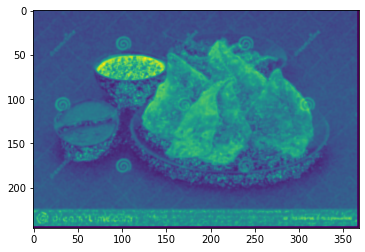

In [117]:
##Apply the kernel KGLarge to the image matrix and display the result.
"""
I have used gaussian2 variable instead of KGlarge for consistency with my above code
"""
def conv_large():
    
    padded_image2=np.zeros((248,370),dtype=np.float64)
    padded_image2[1:-1,1:-1]=imgmat[:,:,0]
    gaussian2=np.array([[0,1,2,1,0],[1,4,8,4,1],[2,8,16,8,2],[1,4,8,4,1],[0,1,2,1,0]])
    gaussian2=gaussian2/80
    output_image3=np.zeros((246,368),dtype=np.float64)

   
    for i in range(2,246):

      for j in range(2,368):
          output_image3[i-2,j-2] = padded_image2[i-2,j-2]*gaussian2[0,0] + padded_image2[i-2,j-1]*gaussian2[0,1] + padded_image2[i-2,j]*gaussian2[0,2] +padded_image2[i-2,j+1]*gaussian2[0,3] + padded_image2[i-2,j+2]*gaussian2[0,4] + padded_image2[i-1,j-2]*gaussian2[1,0] + padded_image2[i-1,j-1]*gaussian2[1,1] + padded_image2[i-1,j]*gaussian2[1,2] + padded_image2[i-1,j+1]*gaussian2[1,3] + padded_image2[i-1,j+2]*gaussian2[1,4] + padded_image2[i,j-2]*gaussian2[2,0] + padded_image2[i,j-1]*gaussian2[2,1] + padded_image2[i,j]*gaussian2[2,2] + padded_image2[i,j+1]*gaussian2[2,3] + padded_image2[i,j+2]*gaussian2[2,4] + padded_image2[i+1,j-2]*gaussian2[3,0] + padded_image2[i+1,j-1]*gaussian2[3,1] + padded_image2[i+1,j]*gaussian2[3,2] + padded_image2[i+1,j+1]*gaussian2[3,3] + padded_image2[i+1,j+2]*gaussian2[3,4] + padded_image2[i+2,j-2]*gaussian2[4,0] + padded_image2[i+2,j-1]*gaussian2[4,1] + padded_image2[i+2,j]*gaussian2[4,2] + padded_image2[i+2,j+1]*gaussian2[4,3] + padded_image2[i+2,j+2]*gaussian2[4,4]  
    plt.imshow(output_image3)
conv_large()

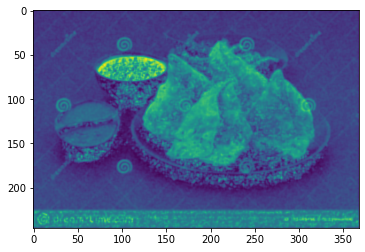

In [118]:
##Compare with applying Gaussian blur applied twice. Which one blurs more?
"""
KGlarge(gaussian2) blurs more than blur applied twice
"""
convlayerfilter()##The function with the larger gaussian kernel has been called below

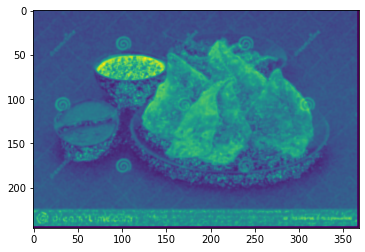

In [119]:
conv_large()##We can see that the larger matrix have blurred the image more than the image blurred twice

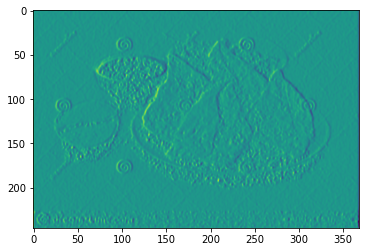

In [120]:
##Perform the convolution of the original image with the Sobel kernels using the convolution function conv2 and
##save the resulting arrays as Sobel1 and Sobel2. Display the results in new figure windows.


Ks1=np.array([[-1,0,1],[-2,0,2],[-1,0,1]])#Creating a sobel kernel
Ks2=np.array([[-1,-2,-1],[0,0,0],[1,2,1]])#Creating the second sobel kernel
S1=np.zeros((246,368),dtype=np.float64)
S2=np.zeros((246,368),dtype=np.float64)
Sobel1=np.zeros((246,368),dtype=np.float64)
Sobel2=np.zeros((246,368),dtype=np.float64)
def conv2():
    
    for i in range(1,247):

      for j in range(1,369):
          Sobel1[i-1,j-1] = padded_image[i-1,j-1]*Ks1[0,0] + padded_image[i-1,j]*Ks1[0,1] + padded_image[i-1,j+1]*Ks1[0,2] +padded_image[i,j-1]*Ks1[1,0] + padded_image[i,j]*Ks1[1,1] + padded_image[i,j+1]*Ks1[1,2]+ padded_image[i+1,j-1]*Ks1[2,0] + padded_image[i+1,j]*Ks1[2,1] + padded_image[i+1,j+1]*Ks1[2,2]
    plt.imshow(Sobel1)
conv2()

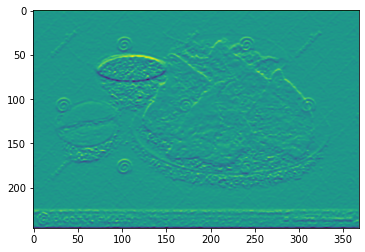

In [121]:
def conv2a():
    for i in range(1,247):

      for j in range(1,369):
          Sobel2[i-1,j-1] = padded_image[i-1,j-1]*Ks2[0,0] + padded_image[i-1,j]*Ks2[0,1] + padded_image[i-1,j+1]*Ks2[0,2] +padded_image[i,j-1]*Ks2[1,0] + padded_image[i,j]*Ks2[1,1] + padded_image[i,j+1]*Ks2[1,2]+ padded_image[i+1,j-1]*Ks2[2,0] + padded_image[i+1,j]*Ks2[2,1] + padded_image[i+1,j+1]*Ks2[2,2]
    plt.imshow(Sobel2)
conv2a()

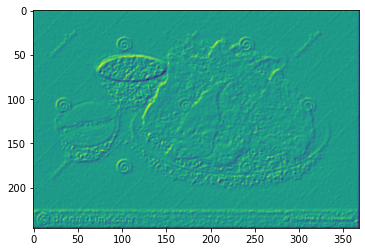

In [122]:
##Create a combined image with both horizontal and vertical edges by summing up the matrices KSobel1, KSobel2. 
##Display the result in a new figure window


Ks3=Ks1+Ks2#summing up the matrices KSobel1 and KSobel2
Sobel12=np.zeros((246,368),dtype=np.float64)

def conv2b():
    
    for i in range(1,247):

      for j in range(1,369):
          Sobel12[i-1,j-1] = padded_image[i-1,j-1]*Ks3[0,0] + padded_image[i-1,j]*Ks3[0,1] + padded_image[i-1,j+1]*Ks3[0,2] +padded_image[i,j-1]*Ks3[1,0] + padded_image[i,j]*Ks3[1,1] + padded_image[i,j+1]*Ks3[1,2]+ padded_image[i+1,j-1]*Ks3[2,0] + padded_image[i+1,j]*Ks3[2,1] + padded_image[i+1,j+1]*Ks3[2,2]
    plt.imshow(Sobel12)
conv2b()

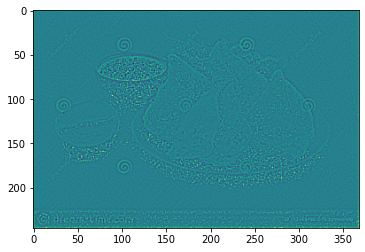

In [123]:
##Use of Laplacian edge detection

def conv3():
    Kl=np.array([[0,-1,0],[-1,4,-1],[0,-1,0]])
    lap=np.zeros((246,368),dtype=np.float64)
    for i in range(1,247):

      for j in range(1,369):
          lap[i-1,j-1] = padded_image[i-1,j-1]*Kl[0,0] + padded_image[i-1,j]*Kl[0,1] + padded_image[i-1,j+1]*Kl[0,2] +padded_image[i,j-1]*Kl[1,0] + padded_image[i,j]*Kl[1,1] + padded_image[i,j+1]*Kl[1,2]+ padded_image[i+1,j-1]*Kl[2,0] + padded_image[i+1,j]*Kl[2,1] + padded_image[i+1,j+1]*Kl[2,2]
    plt.imshow(lap)
conv3()